In [12]:
!pwd

/Users/shihosato/src/github.com/twinkle13531/master_degree/202012/QA/20bit


In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import sys, os
sys.path.append(os.path.join('..'))

In [20]:
import QA_DwaveSampler_AutoEmbedding as qda
import pandas as pd
import numpy as np
import timeit
import statistics
import math

In [16]:
bit = 20
n = 100
num_reads = 100
chain_strength = 11

In [23]:
valid_y_num_sum = 0
time_list = []
p_list = []
occurance_list_list = []
for num in [0, 1, 2, 3, 4]:
    path = '../../input/ost{}_{}.csv'.format(bit, num)
    df = pd.read_csv(path, sep=',')
    bqm = qda.make_Hamiltonian(df)
    QDA = qda.QA_DSampler_AEmbedding(df, bqm, n, num_reads, chain_strength)
    
    valid_y_info_list, valid_y_num, elapsed_time = QDA.find_valid_y_time_ntimes()
    print('number of valid y of {}bit_{} data is {}'.format(bit, num, valid_y_num))
    print('calculation time of {}bit_{} data is {}'.format(bit, num, elapsed_time))
    valid_y_num_sum += valid_y_num
    time_list.append(elapsed_time)
    
    p_ = qda.p_value(df, valid_y_info_list)
    print('p value of {}bit_{} data is {}'.format(bit, num, p_))
    p_list.append(p_)
    
    occurance_list = [int(valid_y_info[2]) for valid_y_info in valid_y_info_list]
    #print(occurance_list)
    print('-------------------------------------')
    
    if len(occurance_list) == 0:
        occurance_list_list.append(0)
    else:
        occurance_list_list.append(statistics.mean(occurance_list))
print('mean number of valid y of {} bit data is {}'.format(bit, valid_y_num_sum/5))
print('mean calculate time of {} bit data is {}'.format(bit, statistics.mean(time_list)))
print('mean p value of {} bit data is {}'.format(bit, statistics.mean(p_list)))
print('mean sample occurrence of {} bit data is {}'.format(bit, statistics.mean(occurance_list_list)))

number of valid y of 20bit_0 data is 1100
calculation time of 20bit_0 data is 0.0032529830932617188
p value of 20bit_0 data is 0.09090909090909091
-------------------------------------
number of valid y of 20bit_1 data is 600
calculation time of 20bit_1 data is 0.0032758712768554688
p value of 20bit_1 data is 0.8333333333333334
-------------------------------------
number of valid y of 20bit_2 data is 300
calculation time of 20bit_2 data is 0.0035250186920166016
p value of 20bit_2 data is 0.3333333333333333
-------------------------------------
number of valid y of 20bit_3 data is 300
calculation time of 20bit_3 data is 0.003698110580444336
p value of 20bit_3 data is 0.6666666666666666
-------------------------------------
number of valid y of 20bit_4 data is 200
calculation time of 20bit_4 data is 0.004288196563720703
p value of 20bit_4 data is 0.0
-------------------------------------
mean number of valid y of 20 bit data is 500.0
mean calculate time of 20 bit data is 0.0036080360412

In [24]:
occurance_list_list

[1, 1, 1, 1, 1]

In [ ]:
valid_y_num_sum = 0
time_sum = 0
p_list = []
occurance_list_list = []
for num in [0, 1, 2, 3, 4]:
    path = '../../input/ost{}_{}.csv'.format(bit, num)
    df = pd.read_csv(path, sep=',')
    bqm = qda.make_Hamiltonian(df)
    time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)
    n = 100
    num_reads = 100
    chain_strength = 11
    QDA = qda.QA_DSampler_AEmbedding(df, bqm, time_once, n, num_reads, chain_strength)
    
    valid_y_info_list, valid_y_num = QDA.find_valid_y_ntimes()
    print('mean number of valid y of {} bit data is {}'.format(bit, valid_y_num_sum/5))
    valid_y_num_sum += valid_y_num
    
    time_sum += QDA.time_measurement()
    
    p_list.append(qda.p_value(df, valid_y_info_list))
    
    occurance_list = [int(valid_y_info[2]) for valid_y_info in valid_y_info_list]
    occurance_list_list.append(sum(occurance_list)/len(occurance_list))

In [ ]:
occurance_list_list

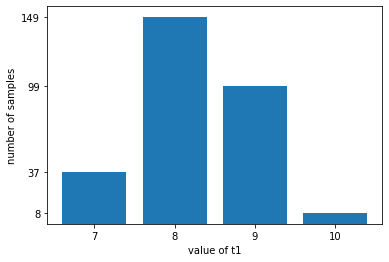

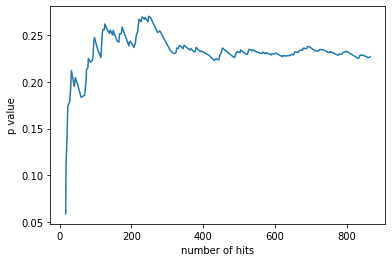

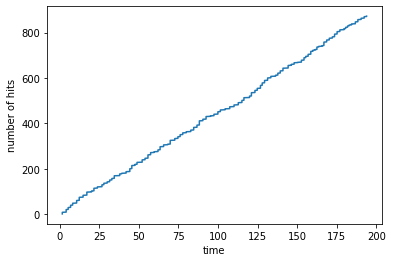

IndexError: tuple index out of range

In [7]:
for num in [0, 1, 2, 3, 4]:
    path = '../../input/ost{}_{}.csv'.format(bit, num)
    df = pd.read_csv(path, sep=',')
    bqm = qda.make_Hamiltonian(df)
    time_once = timeit.timeit("qda.make_Hamiltonian(df)", globals=globals(), number=1)
    n = 100
    num_reads = 100
    chain_strength = 11
    QDA = qda.QA_DSampler_AEmbedding(df, bqm, time_once, n, num_reads, chain_strength)
    
    # t1_hist
    plot_path = '{}/DwSamplerAutoEmbed_{}bit_{}_n100_num100_strength11_t1_hist'.format(num, bit, num)
    hist_dic = QDA.y_num_t1_hist(valid_y_info_list, plot_path)
    
    # p value transition
    output_path = '{}/DwSamplerAutoEmbed_{}bit_{}_n100_num100_strength11_p_value_transition'.format(num, bit, num)
    valid_y_num, valid_y_list, p_dic = QDA.p_value_transition(valid_y_info_list, output_path)
    
    # number of y and time
    path = '{}/DSampler_AEmbed_{}bit_{}_time_num'.format(num, bit, num)
    valid_y_list, valid_y_num_list, time_list = QDA.time_num_y(path)
    
    # occurance histgram
    plot_path = '{}/DwSamplerAutoEmbed_{}bit_{}_n100_num100_strength11_occurance_hist'.format(bit, num)
    occurance_list = QDA.occurance_hist(valid_y_info_list, plot_path)